In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)

(60000, 28, 28)


In [6]:
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

In [7]:
# number of classes
k = len(set(y_train))
k

10

In [23]:
# Input layer
tf.random.set_seed(45)

i = Input(shape=x_train[0].shape)

# Convolutional layers with MaxPooling, larger kernels, and different strides
x = Conv2D(32, (5, 5), strides=1, activation='relu')(i)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (5, 5), strides=1, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), strides=1, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# Flatten before dense layers
x = Flatten()(x)

# Dropout after dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)  # Increased dropout rate

# Batch normalization for regularization
x = BatchNormalization()(x)

# Additional dense layer
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)  # Increased dropout rate

# Output layer with appropriate size (k) and softmax activation
x = Dense(k, activation='softmax')(x)

# Create the model
model = Model(i, x)



In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         7385

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(optimizer=AdamW(weight_decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1217 - accuracy: 0.9563 - val_loss: 0.3702 - val_accuracy: 0.9081
Epoch 2/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1229 - accuracy: 0.9554 - val_loss: 0.3051 - val_accuracy: 0.9104
Epoch 3/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1144 - accuracy: 0.9581 - val_loss: 0.3260 - val_accuracy: 0.9122
Epoch 4/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1121 - accuracy: 0.9598 - val_loss: 0.3402 - val_accuracy: 0.9106
Epoch 5/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1076 - accuracy: 0.9617 - val_loss: 0.3461 - val_accuracy: 0.9069
Epoch 6/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1022 - accuracy: 0.9620 - val_loss: 0.3638 - val_accuracy: 0.9054
Epoch 7/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0985 - accuracy: 0.9653 - val_loss: 0

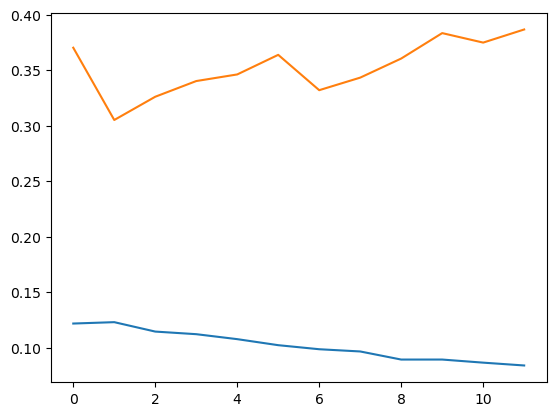

In [24]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

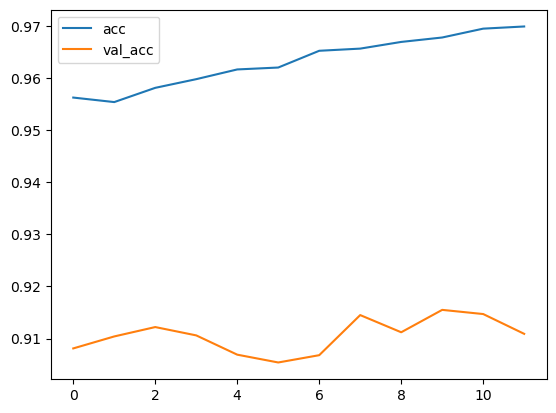

In [25]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]]


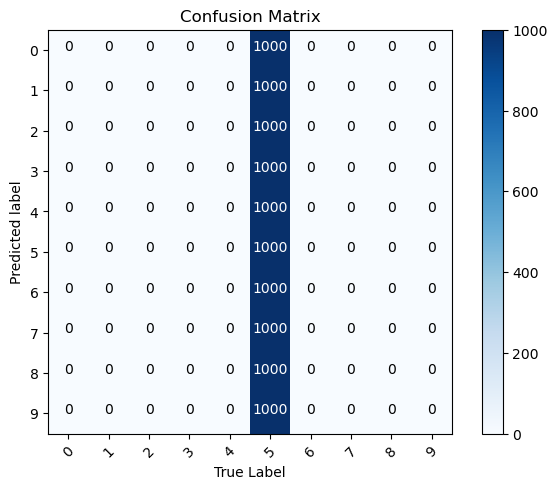

In [28]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color='white' if cm[i,j] > thresh else 'black'
                 )
    plt.tight_layout()
    plt.xlabel('True Label')
    plt.ylabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 2 Predicted: 5')

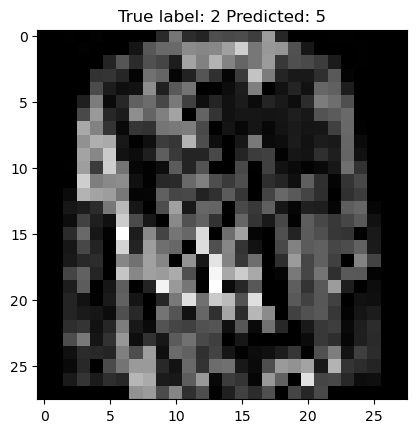

In [32]:
# Show misclassified examples
misclass_id = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_id)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))